In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import make_pipeline

In [15]:
df = pd.read_csv('auto-mpg.csv')

df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [16]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [17]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [21]:
print(df['horsepower'].unique())

['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']


In [22]:
df = df[df['horsepower'] != '?']

In [23]:
# Chuyển đổi kiểu dữ liệu thành int64
df['horsepower'] = df['horsepower'].astype('int64')

C:\Users\T14\AppData\Local\Temp\ipykernel_24568\582764266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['horsepower'] = df['horsepower'].astype('int64')


In [24]:
df['power_to_weight'] = df['horsepower'] / df['weight']
df['displacement_per_cylinder'] = df['displacement'] / df['cylinders']

df

C:\Users\T14\AppData\Local\Temp\ipykernel_24568\581656552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['power_to_weight'] = df['horsepower'] / df['weight']
C:\Users\T14\AppData\Local\Temp\ipykernel_24568\581656552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['displacement_per_cylinder'] = df['displacement'] / df['cylinders']


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,power_to_weight,displacement_per_cylinder
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0.037100,38.375
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0.044679,43.750
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0.043655,39.750
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0.043694,38.000
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0.040591,37.750
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,0.030824,35.000
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,0.024413,24.250
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,0.036601,33.750
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,0.030095,30.000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   mpg                        392 non-null    float64
 1   cylinders                  392 non-null    int64  
 2   displacement               392 non-null    float64
 3   horsepower                 392 non-null    int64  
 4   weight                     392 non-null    int64  
 5   acceleration               392 non-null    float64
 6   model year                 392 non-null    int64  
 7   origin                     392 non-null    int64  
 8   car name                   392 non-null    object 
 9   power_to_weight            392 non-null    float64
 10  displacement_per_cylinder  392 non-null    float64
dtypes: float64(5), int64(5), object(1)
memory usage: 36.8+ KB


In [28]:
df = df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'power_to_weight', 'displacement_per_cylinder']]

df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,power_to_weight,displacement_per_cylinder
0,18.0,8,307.0,130,3504,12.0,70,1,0.037100,38.375
1,15.0,8,350.0,165,3693,11.5,70,1,0.044679,43.750
2,18.0,8,318.0,150,3436,11.0,70,1,0.043655,39.750
3,16.0,8,304.0,150,3433,12.0,70,1,0.043694,38.000
4,17.0,8,302.0,140,3449,10.5,70,1,0.040591,37.750
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,0.030824,35.000
394,44.0,4,97.0,52,2130,24.6,82,2,0.024413,24.250
395,32.0,4,135.0,84,2295,11.6,82,1,0.036601,33.750
396,28.0,4,120.0,79,2625,18.6,82,1,0.030095,30.000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   mpg                        392 non-null    float64
 1   cylinders                  392 non-null    int64  
 2   displacement               392 non-null    float64
 3   horsepower                 392 non-null    int64  
 4   weight                     392 non-null    int64  
 5   acceleration               392 non-null    float64
 6   model year                 392 non-null    int64  
 7   origin                     392 non-null    int64  
 8   power_to_weight            392 non-null    float64
 9   displacement_per_cylinder  392 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 33.7 KB


Text(0.5, 1.0, 'Correlation Matrix')

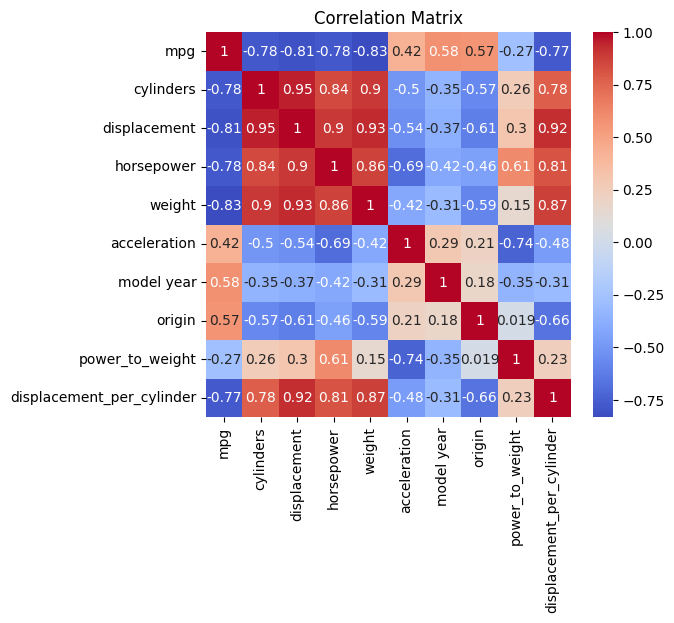

In [31]:
plt.figure(figsize=(20, 5))
    
# Correlation heatmap
plt.subplot(131)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

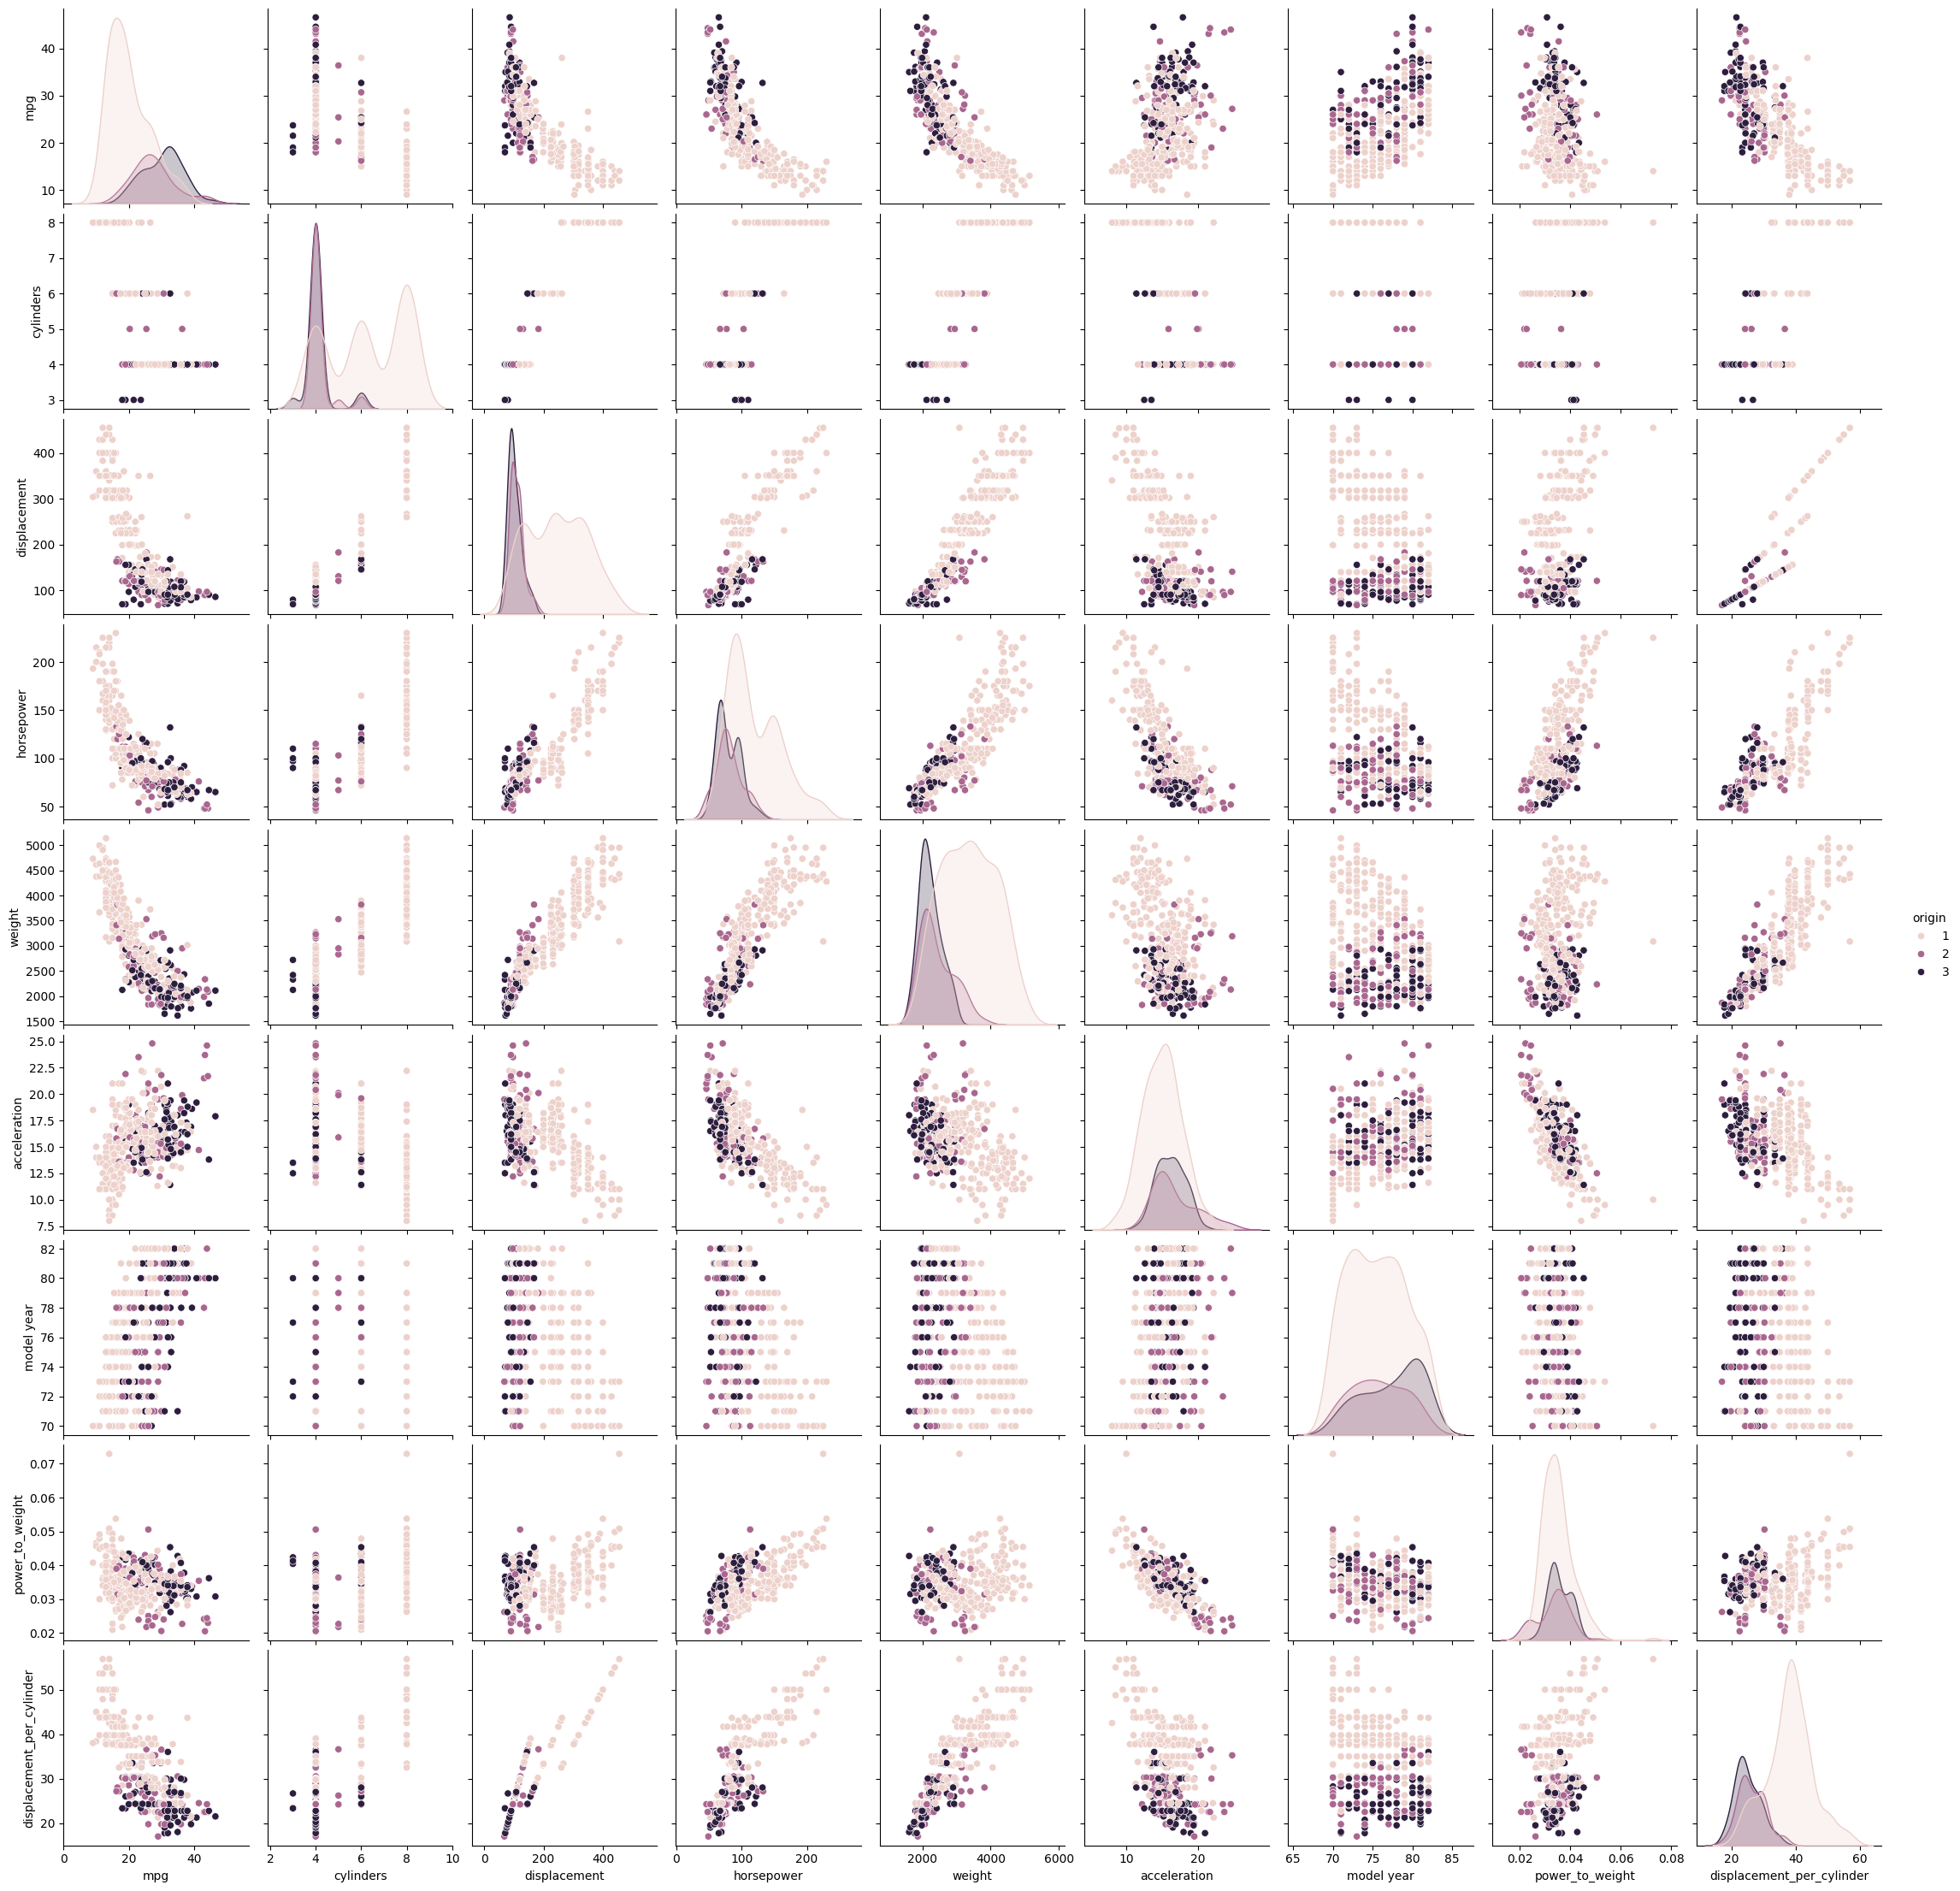

In [32]:
sns.pairplot(df, hue='origin')
plt.show()

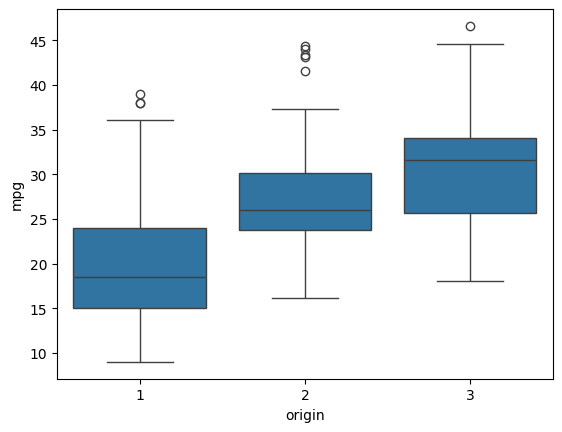

In [33]:
sns.boxplot(x='origin', y='mpg', data=df)
plt.show()

In [34]:
# Prepare features and target
X = df.drop('mpg', axis=1)
y = df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
# Predictions
y_pred = model.predict(X_test)
    
print("\nModel Performance:")
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")


Model Performance:
R2 Score: 0.8183
RMSE: 3.0451


In [37]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
model = LinearRegression()
model.fit(X_poly, y_train)

LinearRegression()